# 코로나 관련 기사수와 확진자수와의 관계 알아보기  
NewsList 데이터에서 감염병이 Covid-19인 기사를 일별로 카운트하고, 이것과 해외 유입 확진자 수가 상관관계가 있는지 확인해보자

In [1]:
import pandas as pd

In [155]:
newsList_df1 = pd.read_excel('C:\\Users\\eh063\\Desktop\\은하\\BOAZ\\분석 BASE\\ML\\포스트 코로나\\corona_contest_data_0406\\3-1. NewsList.xls')
newsList_df2 = pd.read_excel('C:\\Users\\eh063\\Desktop\\은하\\BOAZ\\분석 BASE\\ML\\포스트 코로나\\corona_contest_data_0506_0\\corona_contest_data_0506\\3-1. NewsList.xls')

In [156]:
newsList_df = pd.concat([newsList_df1, newsList_df2])

In [157]:
newsList_df.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


In [158]:
newsList_df['게시일자'] = newsList_df['게시일자'].apply(lambda x : x[0:11])

In [159]:
newsList_df.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04,AFRO,Acquired immuno deficiency syndrome,Viral


In [169]:
pd.DataFrame(newsList_df_covid19.groupby('게시일자')['파일명'].count()).sort_values('게시일자').to_csv('article_count.csv')

In [160]:
newsList_df_covid19 = newsList_df[newsList_df['감염병명'] == 'COVID-19'].reset_index().drop('index', axis=1, inplace=False)

In [146]:
article_count = pd.DataFrame(data={'ds' : newsList_df_covid19['게시일자'].unique(), '기사수' : list(newsList_df_covid19.groupby('게시일자')['파일명'].count())})

In [149]:
article_count

,ds,기사수
0,2020-01-25,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-04,1
...,...,...
119,2020-05-16,793
120,2020-04-11,1
121,2020-04-04,1
122,2019-06-01,6


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
article_count.to_csv('article_count.csv', index=False)

In [179]:
corona_df = pd.read_csv('corona_200508.csv')

In [180]:
corona_df.head()

,ds,y
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,1


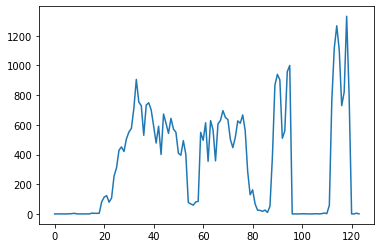

In [183]:
plt.plot(article_count.기사수)

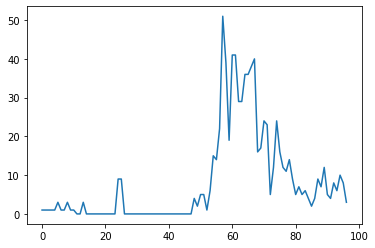

In [184]:
plt.plot(corona_df.y)

g